# Diabetes Classifier
## Introduction
Diabetes mellitus is a disease that affects how the body regulates and uses glucose. It is characterized by abnormally high levels of glucose in the blood. A hormone known as insulin regulates glucose levels in the blood. It is produced by the islet cells in the pancreas—an impairment in the body's ability to make or respond to insulin results in diabetes. Diabetes is classified into type 1 diabetes and type 2 diabetes. The former occurs when the pancreas produces insufficient insulin, while the latter occurs when cells do not respond to insulin. In this project, I aim to build a model that can accurately predict whether an individual has diabetes. Using machine learning to diagnose diabetes will make the diagnostic process more efficient, which will, in turn, make treatment easier and perhaps more effective.

## Dataset Description
The dataset was downloaded from Kaggle and was originally obtained from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) data repository. It contains several records of the Pima Indians of Arizona and Mexico. This population has the highest reported prevalence of diabetes of any group in the world. There are 8 Predictors in the dataset, which include the number of pregnancies the patient has had, their BMI, insulin level, age, blood pressure, diabetes pedigree function, and skin thickness

## Data Dictionary
Pregnancies: Number of times the patients have been pregnant
Glucose: Plasma glucose concentration in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skinfold thickness (mm)
Insulin: Two-hour serum insulin
BMI: Body Mass Index
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age in years
Outcome: Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

## Objective 
The aim is to build and compare several models that can accurately predict whether an individual has diabetes. The chosen classification algorithms include KNN, decision Tree, and different Naive Baiyes models. In this project, I performed the following steps:
- Exploratory data analysis
- Chossing a validation framework
- Comparing all the resulting models from the chosen algorithms


## Importing Relevant Libraries

In [93]:
# importing libraries for calculation and data manipulation
import pandas as pd   
import numpy as np    
# importing plotting libraries
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns

import time
import warnings
warnings.filterwarnings("ignore")

# importing model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier


# importing validation libraries
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

# setting a random state to ensure cosistency or reproducibility of the results
SEED = 1



## Importing, Reading and Exploring the Dataset
### Observations
- There are 9 variables, 8 of which are the predictors.
- There are 768 observations.
- There are no null values: however, blood glucose, blood pressure, BMI, and skin thickness could not possibly be 0. Therefore, I must replace the zeros with either the mean or median. I decided to fill the zeros with the median.
- There is a slight class imblance in the dataset, 65% of the observations are non-diabetic, and 35% are diabetic. I decided not to treat this, as it is a minor imbalance. Oversampling could lead to overfitting and undersampling is not ideal, given the low number of observations in the dataset.
- Glucose is the most important feature in the dataset. This is expected because diabetes is mainly characterized by high blood glucose levels.
- BMI is the second most important feature in the dataset. This is also expected given that obesity is one of the risk factors for diabetes, and BMI may indicate obesity.
- There is a positive correlation between blood  glucose and BMI.
- There is a positive correlation between blood pressure and BMI.

In [94]:
# Importing the dataset
df=pd.read_csv('/Users/Abdul/Desktop/Data Science/ML/Dataset/health care diabetes.csv')

In [95]:
# Reading the dataset
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
595,0,188,82,14,185,32.0,0.682,22,1
77,5,95,72,33,0,37.7,0.370,27,0
101,1,151,60,0,0,26.1,0.179,22,0
545,8,186,90,35,225,34.5,0.423,37,1
192,7,159,66,0,0,30.4,0.383,36,1
100,1,163,72,0,0,39.0,1.222,33,1
107,4,144,58,28,140,29.5,0.287,37,0
280,0,146,70,0,0,37.9,0.334,28,1
519,6,129,90,7,326,19.6,0.582,60,0
387,8,105,100,36,0,43.3,0.239,45,1


In [96]:
# checking the dimensions of the data set
df.shape

(768, 9)

In [97]:
# checking the data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [98]:
# checkings for nulls
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [99]:
# checking the descriptive statistics of the datset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [100]:
# defining a function to replace zeros with median values
def remove_zeros(df):
    df.replace(0,np.nan,inplace=True)
    df.fillna(df.median(),inplace=True)


In [101]:
# applying the function to the features that could not possibly be zero 
remove_zeros(df['Glucose'])
remove_zeros(df['BloodPressure'])
remove_zeros(df['Insulin'])
remove_zeros(df['BMI'])
remove_zeros(df['SkinThickness'])

In [102]:
# confirming if the zeros have been replaced with the median values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [103]:
# confirming no null value is present 
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

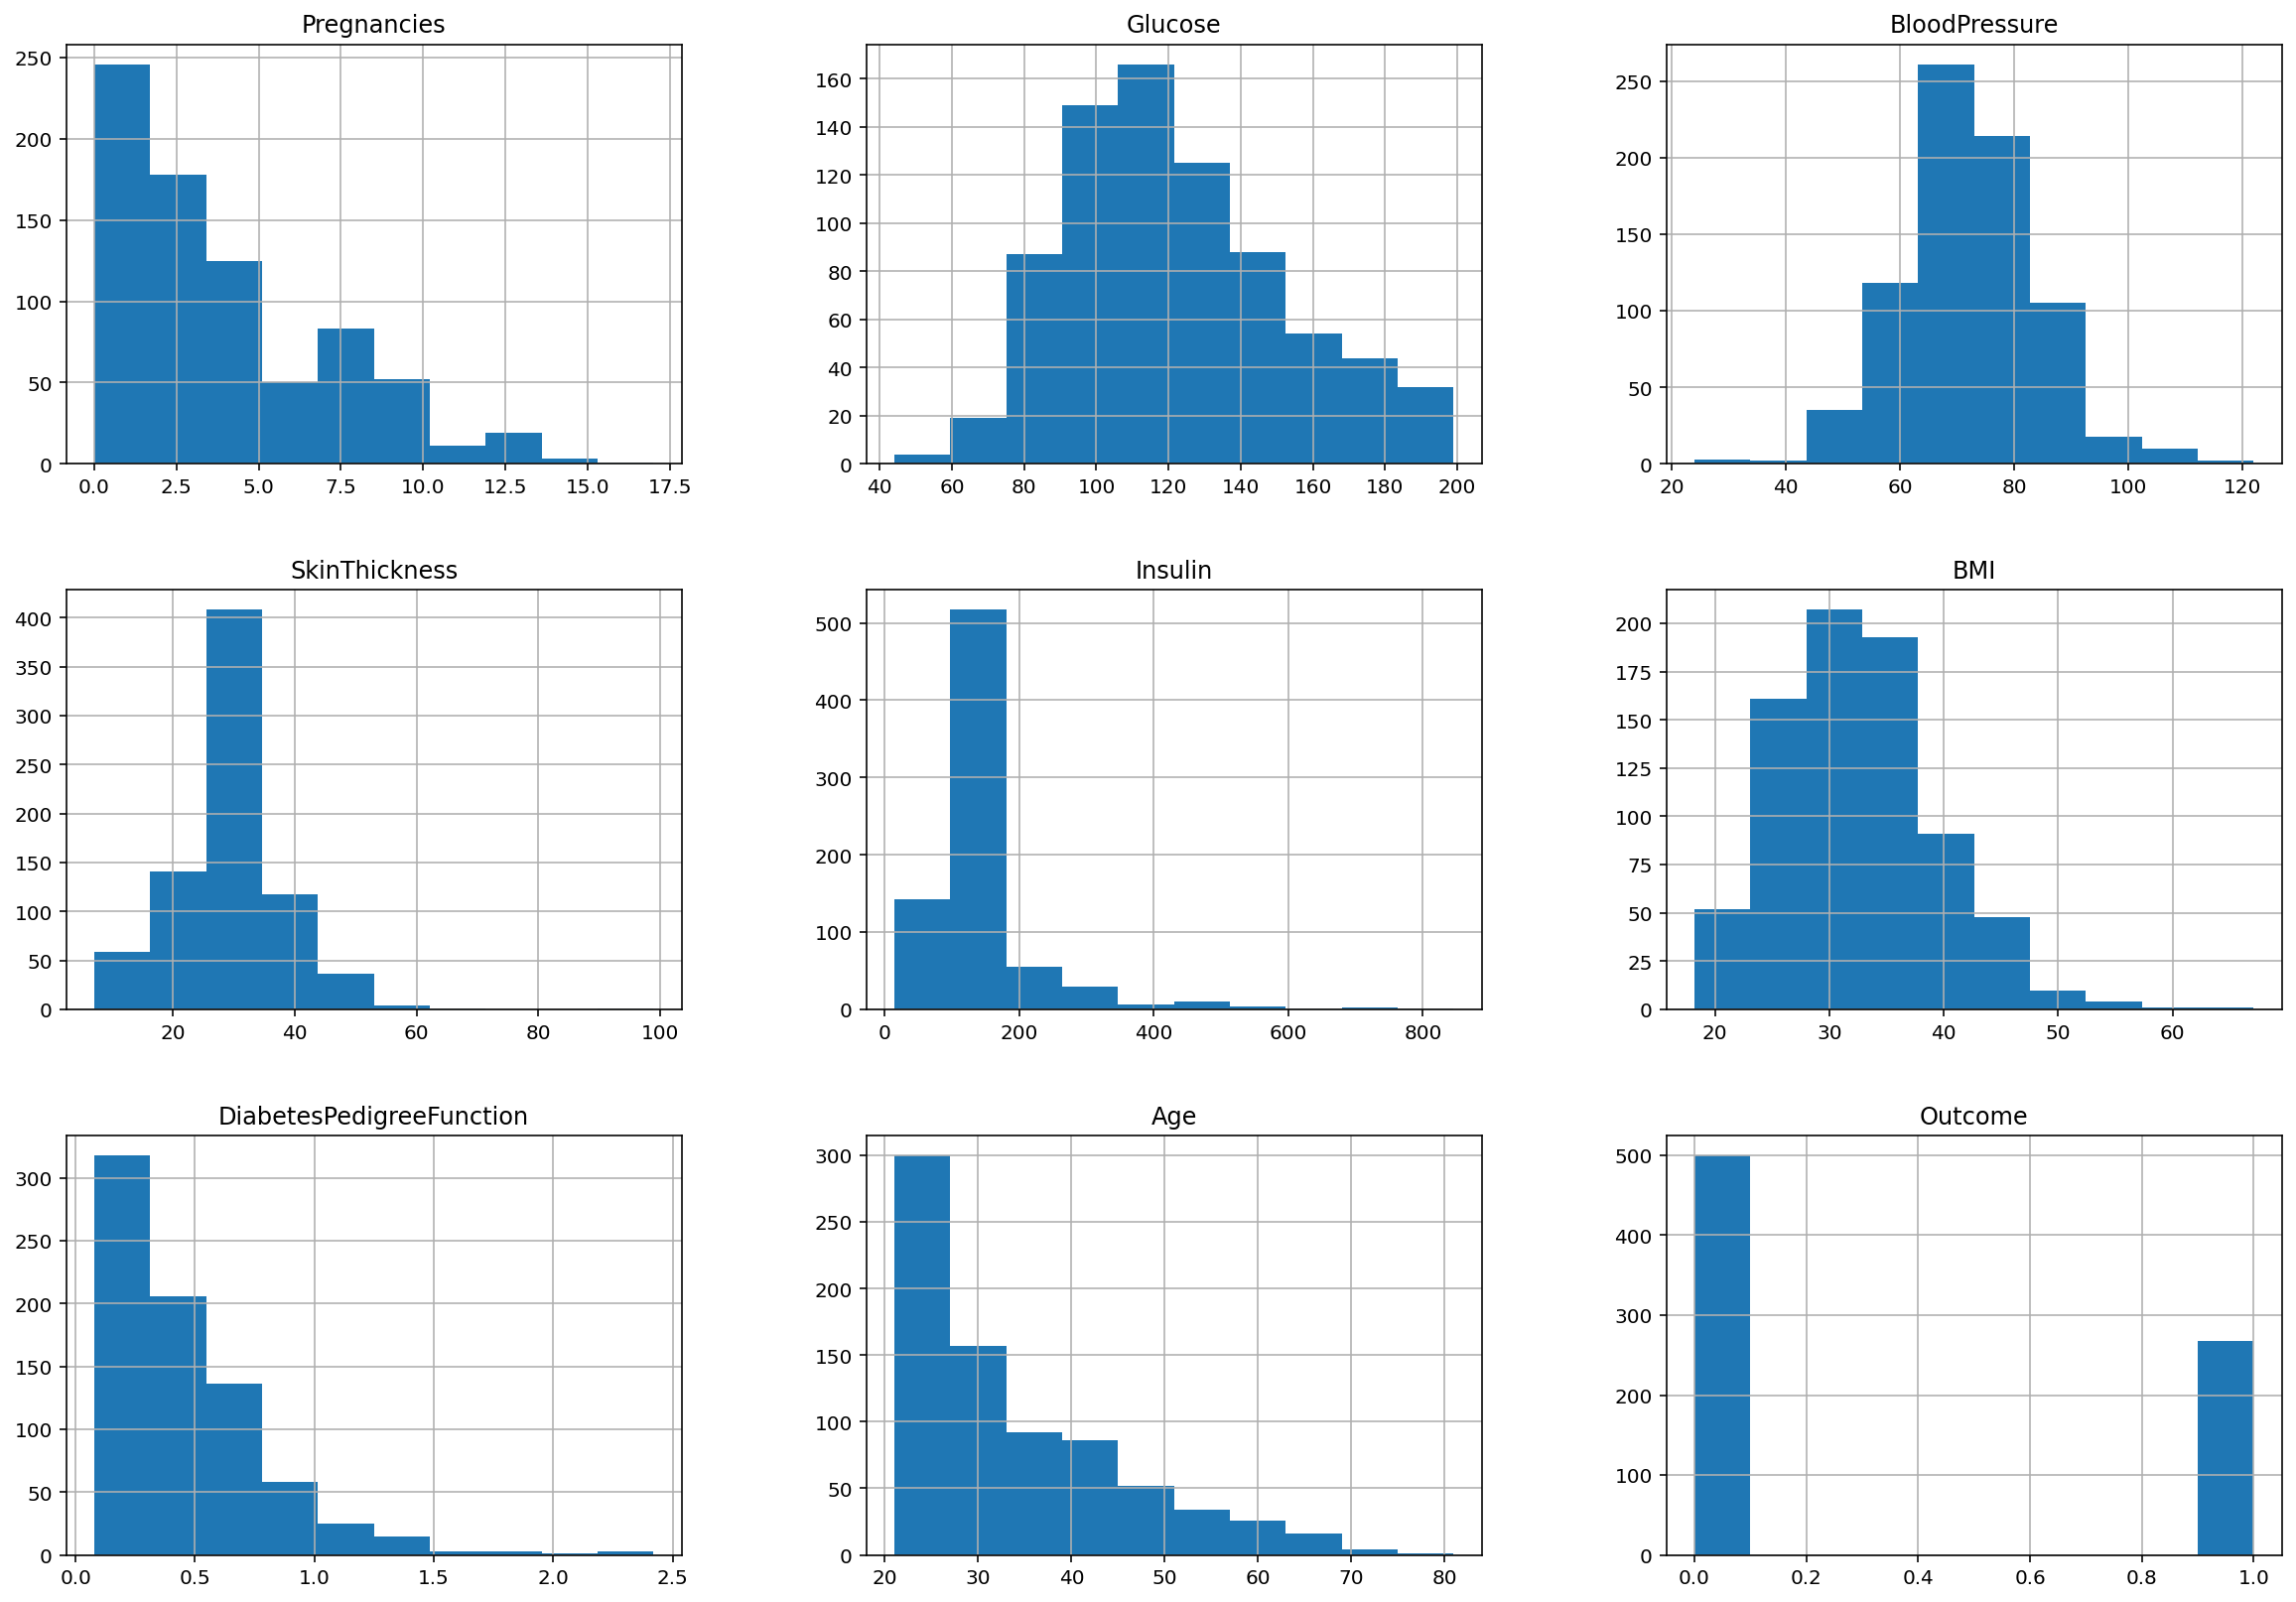

In [104]:
# visually exploring the distribution of each feature
df.hist(figsize=(20,14));

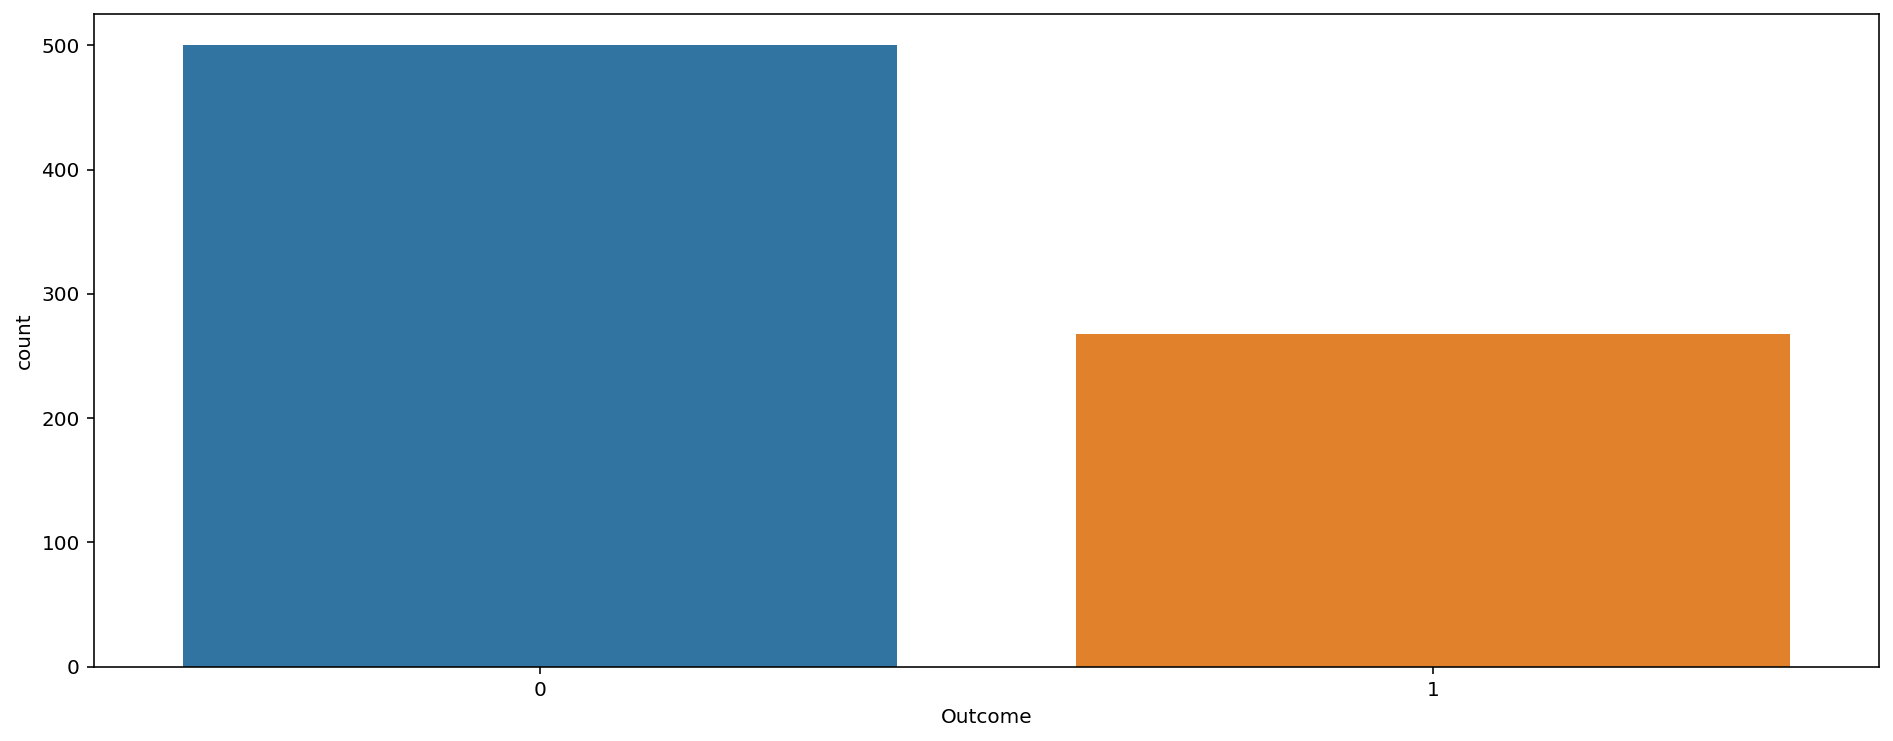

In [105]:
# checking for class imbalance
plt.figure(figsize=(16,6))
sns.countplot(x=df['Outcome']);

In [106]:
# evaluating the class apparent class imbalance
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

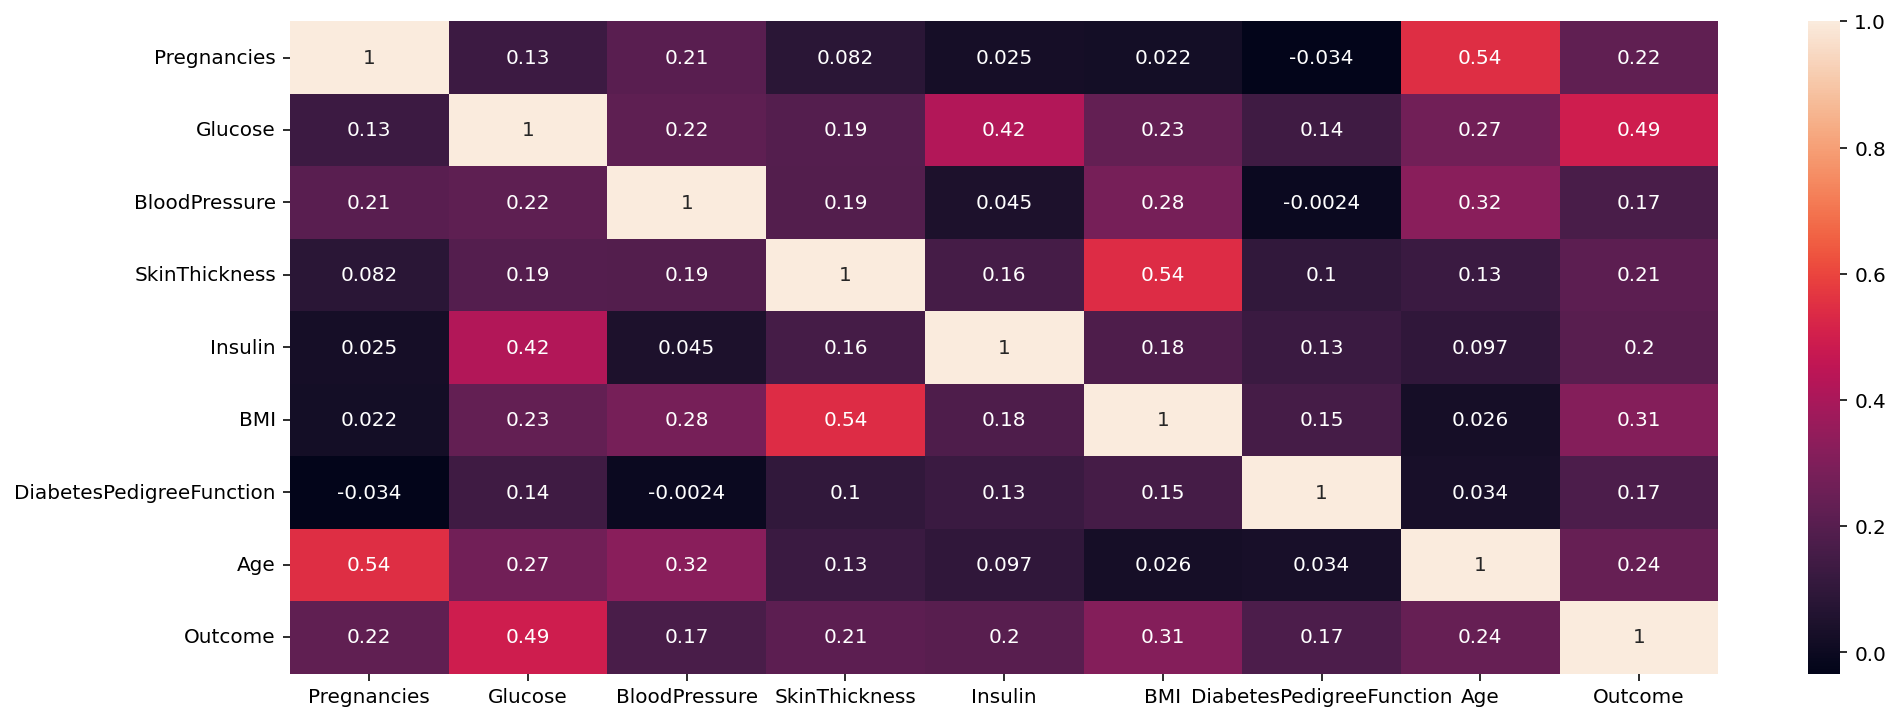

In [107]:
# checking for correlation amongst predictors
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,);

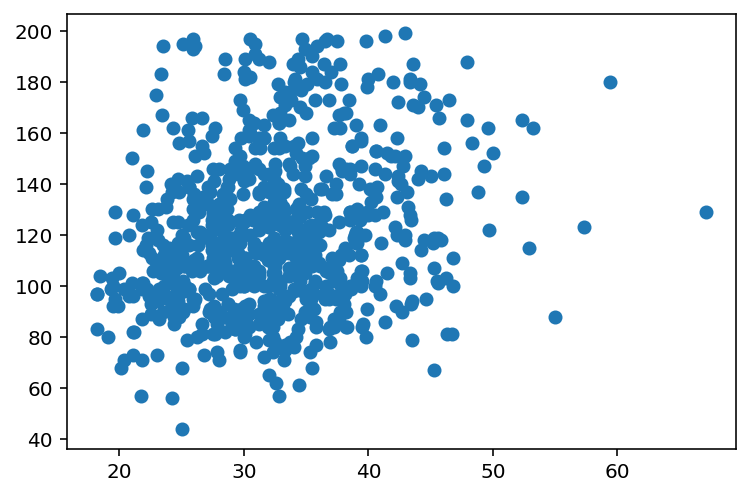

In [108]:
# checking for correlation between glucose and BMI 
plt.scatter(y=df['Glucose'],x=df['BMI']);


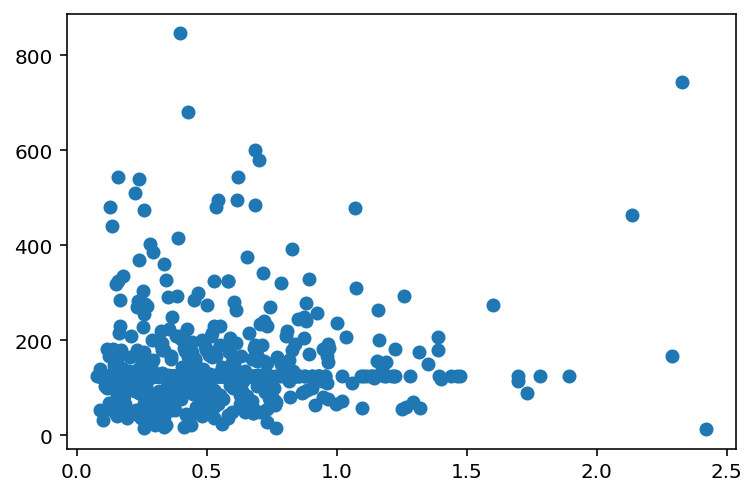

In [109]:
# checking for correlation between Insulin and diabetes pedigree function
plt.scatter(y=df['Insulin'],x=df['DiabetesPedigreeFunction']);

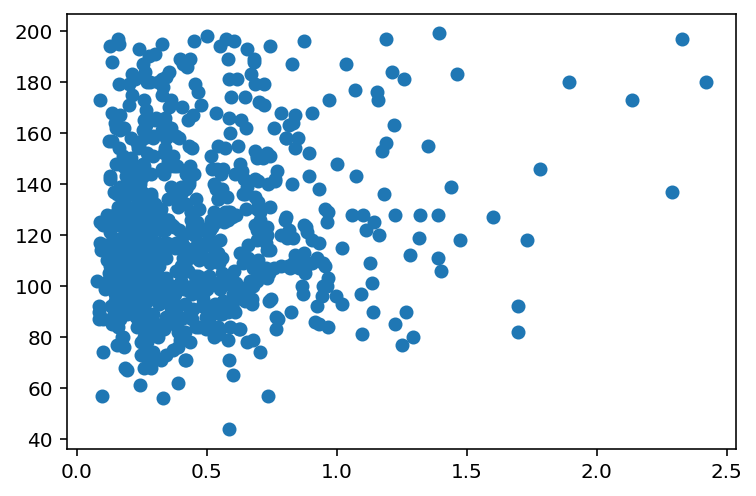

In [110]:
# checking for correlation between Glucose and diabetes pedigree function
plt.scatter(y=df['Glucose'],x=df['DiabetesPedigreeFunction']);

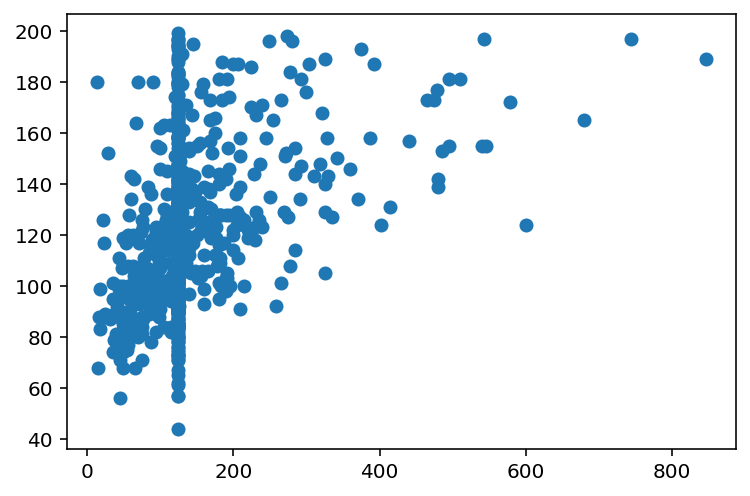

In [111]:
# checking for correlation between Insulin and Insulin
plt.scatter(y=df['Glucose'],x=df['Insulin']);

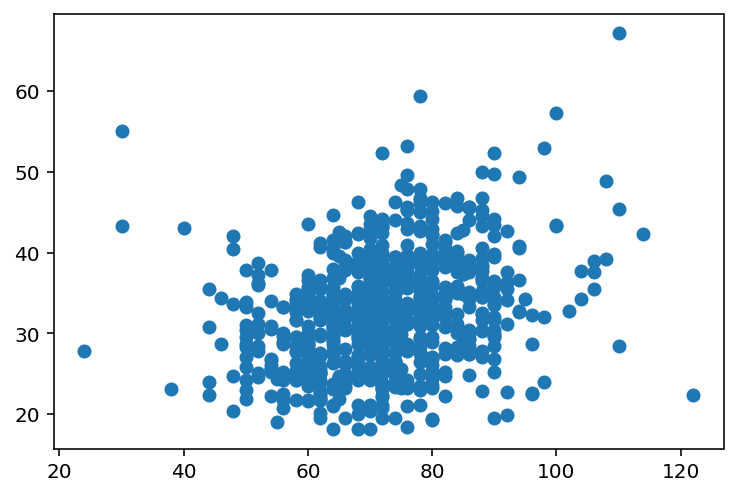

In [112]:
# checking for correlation between BMI and blood pressure

plt.scatter(y=df['BMI'],x=df['BloodPressure']);

In [113]:
#Preparing the dataset for model building
# Assigning the predictors to X
X=df.drop(['Outcome'],axis=1)
# assigning the target to Y
y=df['Outcome']

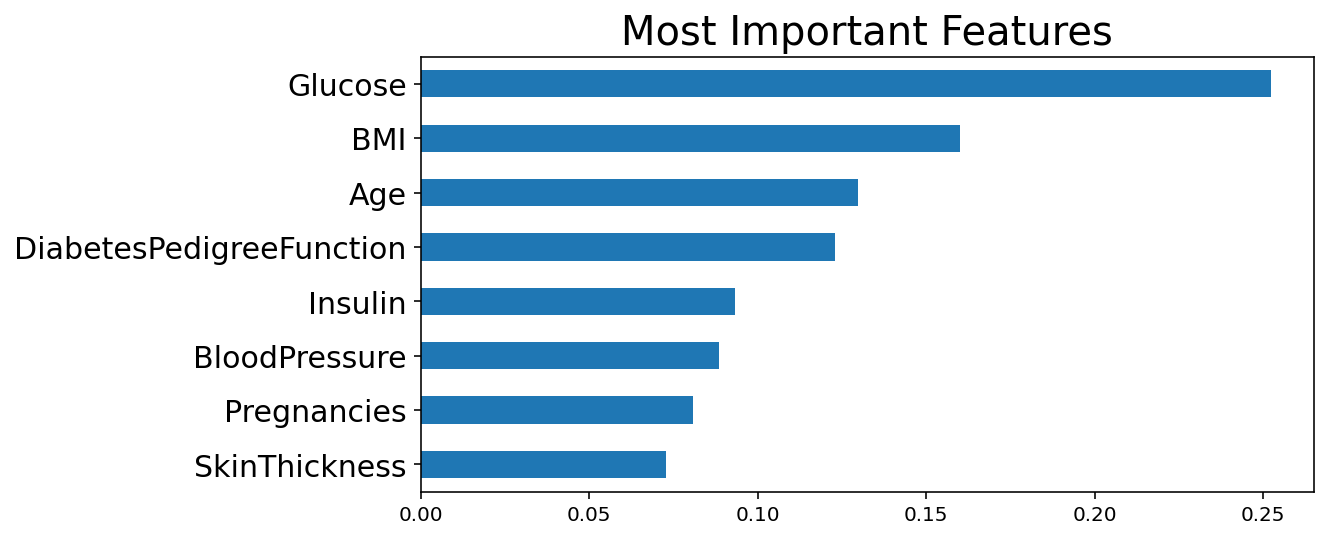

In [114]:
## Looking for the top features using Random Forest

rfc = RandomForestClassifier(random_state=SEED, n_estimators=100)

# Training the random forest model
rfc_model = rfc.fit(X, y)

# Plotting the top features based on thier importance
(pd.Series(rfc_model.feature_importances_, index=X.columns)
    .nlargest(10)  
    .plot(kind='barh', figsize=[8,4])
    .invert_yaxis()) 
plt.yticks(size=15)
plt.title('Most Important Features', size=20);

## Model Building
I built six models using the following algorithms:
- Gaussian Naive Bayes classifier
- Bernoulli Naive Bayes classifier
- Multinomial Naive Bayes clssifier
- Logistic Regression
- KNeighbors classifier
- Decision Tree
## Model Evaluation
Recall and F1 scores are more important than precision and accuracy in evaluating the models. Since recall measures the percentage of positive samples the model correctly classified, recall should precede other evaluation metrics in this case. It is imperative to accurately identify patients that indeed have diabetes so they can get treatment. Conversely, false positives are inconsequential because further tests will reveal that the patient does not have diabetes.
# Observations
- Gaussian Naive Bayes has the best recall, with a recall score of 57%; that is, the model correctly classified 57% of the patients with diabetes.
- The recall scores for these models are too low; therefore, I must try to improve each model by tuning its hyperparameters.


In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=SEED)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


In [116]:
print(X_train.shape,X_test.shape)

(614, 8) (154, 8)


In [117]:
# Baseline model performance evaluation using stratified kFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# defining a function to compile the baseline model reports in a dataframe 
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    logloss      = log_loss(y_test, y_pred)   
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss],
                             'timetaken'    : [0]       })   # timetaken will be used for comparison later
    return df_model

# to evaluate the baseline models
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()


# to concatenate all the baseline models
df_models = pd.concat([baseline_report(gnb, X_train, X_test, y_train, y_test, 'GaussianNB'),
                       baseline_report(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB'),
                       baseline_report(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB'),
                       baseline_report(logit, X_train, X_test, y_train, y_test, 'LogisticRegression'),
                       baseline_report(knn, X_train, X_test, y_train, y_test, 'KNN'),
                       baseline_report(decisiontree, X_train, X_test, y_train, y_test, 'DecisionTree')
                       ], axis=0).reset_index()
df_models = df_models.drop('index', axis=1)
df_models

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.742636,0.645362,0.572536,0.603321,0.801789,8.298361,0
1,BernoulliNB,0.653099,0.000000,0.000000,0.000000,0.476752,12.335277,0
2,MultinomialNB,0.653099,0.499987,0.389590,0.434772,0.650219,13.905331,0
3,LogisticRegression,0.762188,0.713340,0.539424,0.606002,0.812666,7.401229,0
4,KNN,0.713315,0.592799,0.558250,0.571296,0.745532,8.746926,0
5,DecisionTree,0.690604,0.524850,0.577630,0.581317,0.660040,10.316897,0


## Hyperparameter Tuning
I mentioned earlier that there is a slight class imbalance in the dataset. I decided against oversampling and undersampling to avoid overfitting or underfitting the models. Another easy and effective way of addressing class imbalance is by fine-tuning the classification thresholds. The default threshold in a classification model is usually 0.5. I varied the threshold in each of the six models from 0.0001 to 0.9999 to search for the optimal threshold.



In [118]:
def model_report(model, X_train, X_test, y_train, y_test, model_name):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5   # starting with the default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
        for th in th_list[i]:
            if th<0: 
                score_list.append(-1)
                continue
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # displaying the f1score in 4 decimal place
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    accuracy      = model.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    y_pred = model.predict_proba(X_test)[:,1]   
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(rocauc))
    logloss      = log_loss(y_test, y_pred)   
    print(model_name, 'Log-loss: {:.4f}'.format(logloss))

    df_model = pd.DataFrame({'model'        : [model_name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss],
                             'timetaken'    : [1000]       })   
    return df_model

In [119]:
print('\n Tuning GaussianNB Model')
time1 = time.time()
gnb = GaussianNB()
model1 = model_report(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')
model1.timetaken[0] = time.time() - time1


print('\n Tuning BernoulliNB Model"')
time1 = time.time()
bnb = BernoulliNB()
model2 = model_report(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')
model2.timetaken[0] = time.time() - time1


print('\n Tuning MultinomialNB Model')
time1 = time.time()
mnb = MultinomialNB()
model3 = model_report(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')
model3.timetaken[0] = time.time() - time1


 Tuning GaussianNB Model

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.5263,  0.100->0.6842,  0.200->0.7273,  0.300->0.6723,  0.400->0.6545,  0.500->0.6476,  0.600->0.6471,  0.700->0.6667,  0.800->0.5783,  0.900->0.4054,  1.000->0.1017,  
Looping decimal place 2
0.100->0.6842,  0.110->0.6939,  0.120->0.6986,  0.130->0.7042,  0.140->0.7101,  0.150->0.7206,  0.160->0.7206,  0.170->0.7164,  0.180->0.7218,  0.190->0.7218,  0.200->0.7273,  0.210->0.7231,  0.220->0.7231,  0.230->0.7031,  0.240->0.6929,  0.250->0.6929,  0.260->0.6929,  0.270->0.6720,  0.280->0.6885,  0.290->0.6777,  0.300->0.6723,  
Looping decimal place 3
0.190->0.7218,  0.191->0.7218,  0.192->0.7218,  0.193->0.7273,  0.194->0.7273,  0.195->0.7273,  0.196->0.7273,  0.197->0.7273,  0.198->0.7273,  0.199->0.7273,  0.200->0.7273,  0.201->0.7273,  0.202->0.7273,  0.203->0.7273,  0.204->0.7273,  0.205->0.7231,  0.206->0.7231,  0.207->0.7231,  0.208->0.

In [120]:
print('\n Tuning LogisticRegression Model')
time1 = time.time()
print('\nSearch for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)  #produce the k folds for cross validation
score_list = []
c_list = 10**np.linspace(-3,3,200)
for c in c_list:
    logit = LogisticRegression(C = c)
    cvs = (cross_val_score(logit, X_train, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")   # 4 decimal pl
print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
optimal_c = float(c_list[score_list.index(max(score_list))])
print('optimal value of C = {:.3f}'.format(optimal_c))

logit = LogisticRegression(C = optimal_c)
model4 = model_report(logit, X_train, X_test, y_train, y_test, 'LogisticRegression')
model4.timetaken[0] = time.time() - time1


 Tuning LogisticRegression Model

Search for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data
0.6022, 0.6095, 0.6095, 0.6095, 0.6115, 0.6152, 0.6135, 0.6150, 0.6032, 0.6150, 0.6168, 0.6117, 0.6100, 0.6070, 0.6014, 0.6113, 0.6127, 0.5993, 0.6035, 0.6078, 0.5917, 0.6150, 0.6045, 0.6027, 0.5808, 0.6093, 0.6076, 0.6138, 0.6268, 0.6267, 0.6262, 0.5926, 0.6028, 0.6056, 0.6274, 0.5985, 0.6037, 0.6222, 0.6308, 0.6111, 0.5995, 0.6173, 0.6098, 0.6014, 0.6232, 0.6296, 0.6207, 0.6066, 0.6036, 0.5756, 0.6131, 0.6125, 0.5992, 0.5989, 0.5875, 0.6040, 0.6221, 0.5738, 0.6212, 0.6263, 0.6160, 0.5867, 0.6163, 0.6215, 0.6134, 0.5859, 0.6083, 0.6354, 0.5981, 0.6214, 0.6103, 0.6124, 0.6270, 0.6207, 0.6222, 0.6216, 0.6110, 0.6087, 0.6106, 0.6161, 0.6118, 0.5990, 0.6283, 0.6074, 0.6085, 0.6183, 0.6030, 0.6117, 0.5784, 0.5984, 0.6203, 0.6261, 0.6223, 0.6239, 0.6183, 0.6004, 0.6189, 0.6045, 0.6072, 0.6094, 0.5982, 0.6337, 0.6110, 0.6096, 

In [121]:
print('\n Tuning KNN Model ')
time1 = time.time()
print('\nSearch for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)  #produce the k folds
k_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    cvs = cross_val_score(knn, X_train, y_train, cv=kf, scoring='f1').mean()
    k_scores.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")
print('optimal cv F1 score = {:.4f}'.format(max(k_scores)))   # rounding up to 4 decimal place
optimal_k = k_scores.index(max(k_scores))+1   
print('optimal value of K =', optimal_k)

knn = KNeighborsClassifier(n_neighbors = optimal_k)
model5 = model_report(knn, X_train, X_test, y_train, y_test, 'KNN')
model5.timetaken[0] = time.time() - time1




 Tuning KNN Model 

Search for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold(5) Cross Validation on train data
0.5322, 0.4091, 0.5568, 0.4904, 0.5738, 0.5292, 0.5805, 0.5604, 0.5962, 0.5726, 0.6007, 0.5690, 0.6035, 0.5700, 0.6180, 0.5983, 0.6132, 0.5783, 0.6183, 0.5796, optimal cv F1 score = 0.6183
optimal value of K = 19

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.5427,  0.100->0.6092,  0.200->0.6275,  0.300->0.6620,  0.400->0.6667,  0.500->0.6931,  0.600->0.5750,  0.700->0.3030,  0.800->0.1333,  0.900->0.0357,  1.000->0.0000,  
Looping decimal place 2
0.400->0.6667,  0.410->0.6667,  0.420->0.6667,  0.430->0.6847,  0.440->0.6847,  0.450->0.6847,  0.460->0.6847,  0.470->0.6847,  0.480->0.6931,  0.490->0.6931,  0.500->0.6931,  0.510->0.6931,  0.520->0.6931,  0.530->0.6667,  0.540->0.6667,  0.550->0.6667,  0.560->0.6667,  0.570->0.6667,  0.580->0.5750,  0.590->0.5750,  0.600->0.5750,  
Lo

In [123]:
print('\n Tuning  DecisionTreeClassifier Model')
time1 = time.time()
print('\nSearch for optimal max_depth in DecisionTree, vary 2 to 10, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=SEED, shuffle=True)  #produce the k folds for cross validation
d_scores = []
for d in range(2, 11):
    decisiontree = DecisionTreeClassifier(max_depth=d)
    cvs = cross_val_score(decisiontree, X_train, y_train, cv=kf, scoring='f1').mean()
    d_scores.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")
print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # rounding up to 4 decimal place
optimal_d = d_scores.index(max(d_scores))+2   
print('optimal max_depth =', optimal_d)

decisiontree = DecisionTreeClassifier(max_depth=optimal_d)
model6 = model_report(decisiontree, X_train, X_test, y_train, y_test, 'DecisionTree')
model6.timetaken[0] = time.time() - time1



 Tuning  DecisionTreeClassifier Model

Search for optimal max_depth in DecisionTree, vary 2 to 10, using KFold(5) Cross Validation on train data
0.4806, 0.5823, 0.5903, 0.6237, 0.6131, 0.5760, 0.5912, 0.5774, 0.5858, optimal F1 score = 0.6237
optimal max_depth = 5

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.5269,  0.100->0.5976,  0.200->0.6765,  0.300->0.6917,  0.400->0.6355,  0.500->0.6139,  0.600->0.6139,  0.700->0.6139,  0.800->0.4444,  0.900->0.0000,  1.000->0.0000,  
Looping decimal place 2
0.200->0.6765,  0.210->0.6765,  0.220->0.6765,  0.230->0.6765,  0.240->0.6765,  0.250->0.6765,  0.260->0.6765,  0.270->0.6765,  0.280->0.6917,  0.290->0.6917,  0.300->0.6917,  0.310->0.6917,  0.320->0.6917,  0.330->0.6917,  0.340->0.6667,  0.350->0.6667,  0.360->0.6667,  0.370->0.6667,  0.380->0.6355,  0.390->0.6355,  0.400->0.6355,  
Looping decimal place 3
0.270->0.6765,  0.271->0.6765,  0.272->0.6765,  0.273->0.

In [124]:
# concatenate all the tuned models
df_tuned_models = pd.concat([model1,model2,model3,model4,model5,model6],axis = 0).reset_index()
df_tuned_models.drop('index', axis=1, inplace=True)
df_tuned_models

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.759740,0.623377,0.872727,0.727273,0.853260,0.531895,0.344588
1,BernoulliNB,0.642857,0.357143,1.000000,0.526316,0.482828,0.652500,0.208300
2,MultinomialNB,0.597403,0.449438,0.727273,0.555556,0.593756,1.826894,0.345959
3,LogisticRegression,0.772727,0.732143,0.745455,0.738739,0.861708,0.448394,78.590768
4,KNN,0.798701,0.760870,0.636364,0.693069,0.833517,0.687550,1.731504
5,DecisionTree,0.746753,0.589744,0.836364,0.691729,0.791460,1.744839,0.835689


### Observations
- Gaussian Naive Bayes is the winning model with a recall score of 87%, an f1 score of 72%, and an accuracy of 75%. 
- The optimal threshold for the winning model is 0.193.
- Since I prioritized recall in evaluating the models, the Gaussian NB model with a threshold of 0.193 is good enough  to predict whether an individual has diabetes.


 Part of the code and methodology was adapted from James NG's work https://jnyh.medium.com/building-a-machine-learning-classifier-model-for-diabetes-4fca624daed0
